# Exchange Rate Analysis

This script gathers currency exchange rate data using API calls to the AlphaVantage Monthly Foreign Exchange (FX_MONTHLY) dataset.  The data is saved in a dataframe, and is cleaned to preserve the greatest number of common datapoints across currency. The exchange rates for each currency are line plotted over time.  A PNG file of each chart is save in the Output directory.

In [13]:
# set environment
import time
import pycountry
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pull constants from config file
from config import base_country
from config import countries

# retrieve API key
from api_keys import curr_exchange_api


# create empty lists for our dataframe data
country_name = []
currency_name = []
currency_code = []
year = []
close_rate = []


In [14]:

# all exchange rates are in reference to the base currency
base_currency = base_country["currency_code"]

# loop through our list of currencies and pull data from AlphaVantage
for country in countries:

    # pull currency code associated with next country in list
    from_currency = countries[country]["currency_code"]
    
    # build URL for AlphaVantage
    url = f"https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol={from_currency}&to_symbol={base_currency}&apikey={curr_exchange_api}"

    # request data
    try:
        response = requests.get(url).json()
    
        # loop through datapoints and populate data lists
        for record_date in response["Time Series FX (Monthly)"]:
            
            # pull date field apart
            date_list = record_date.split("-")
            
            # check for year-end data (month = 12) and save to data lists
            if (date_list[1] == "12"):
                currency_code.append(from_currency)
                country_name.append(country)
                currency_name.append(countries[country]["currency_name"])
                year.append(date_list[0])
                close_rate.append(response["Time Series FX (Monthly)"][record_date]["4. close"])

    except:
        # catch error but keep going
        print(f"missing data: {from_currency}")

# retrieval takes time, so print when complete
print("Retrieval of currency exchange data complete.")
        
            


Retrieval of currency exchange data complete.


In [15]:
# build dataframe
exchange_data = pd.DataFrame({"currency_code": currency_code, "country name": country_name, "currency_name": currency_name, "year": year, "close rate": close_rate})
exchange_data.head()

,currency_code,country name,currency_name,year,close rate
0,EUR,European Union,Euro,2020,1.2214
1,EUR,European Union,Euro,2019,1.1213
2,EUR,European Union,Euro,2018,1.1466
3,EUR,European Union,Euro,2017,1.1994
4,EUR,European Union,Euro,2016,1.0516


In [16]:
# remove datapoints before 2014 and after 2020
analysis_data = exchange_data.loc[(exchange_data["year"] >= "2014") & (exchange_data["year"] < "2020")]

# just a check for consistent datapoints across currencies
analysis_data.groupby("currency_code").count()

,country name,currency_name,year,close rate
currency_code,,,,
AUD,6,6,6,6
BRL,6,6,6,6
BYN,4,4,4,4
CAD,6,6,6,6
CHF,6,6,6,6
EUR,6,6,6,6
GBP,6,6,6,6
HKD,6,6,6,6
INR,6,6,6,6


In [17]:
# sort dataframe by currency and year
sorted_analysis = analysis_data.sort_values(by=["currency_code", "year"])
sorted_analysis

,currency_code,country name,currency_name,year,close rate
53,AUD,Australia,Australian Dollar,2014,0.8165
52,AUD,Australia,Australian Dollar,2015,0.7289
51,AUD,Australia,Australian Dollar,2016,0.7201
50,AUD,Australia,Australian Dollar,2017,0.7808
49,AUD,Australia,Australian Dollar,2018,0.7048
...,...,...,...,...,...
154,TRY,Turkey,Turkish Lira,2015,0.3423
153,TRY,Turkey,Turkish Lira,2016,0.2830
152,TRY,Turkey,Turkish Lira,2017,0.2633
151,TRY,Turkey,Turkish Lira,2018,0.1884


In [18]:
# pull a list of unique currency codes to plot
curr_codes = sorted_analysis["currency_code"].unique()

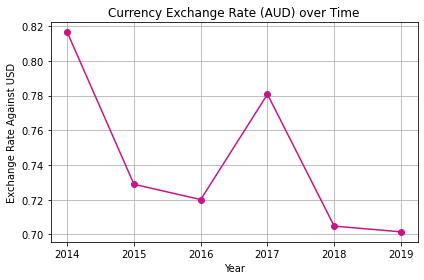

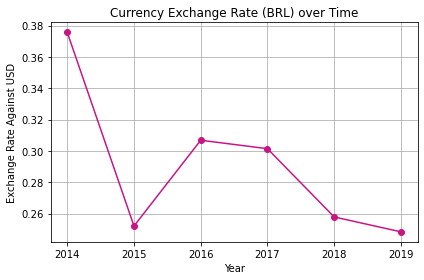

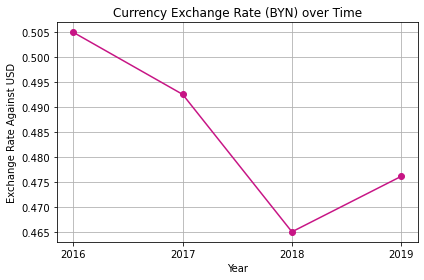

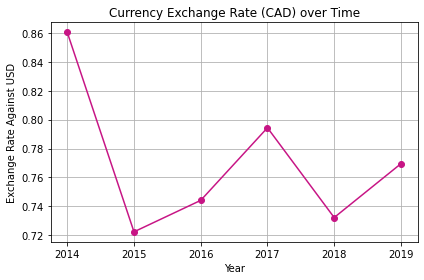

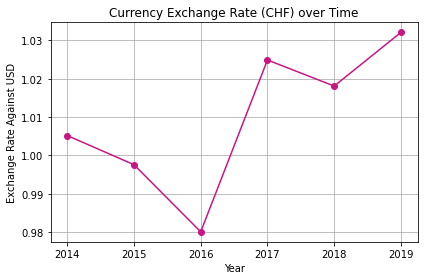

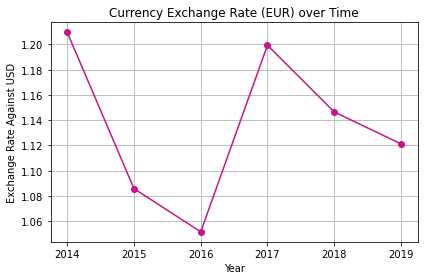

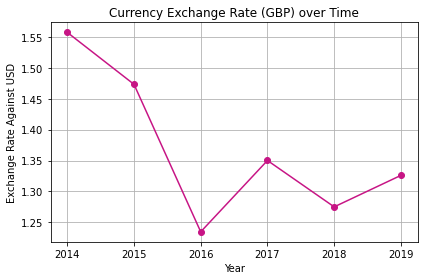

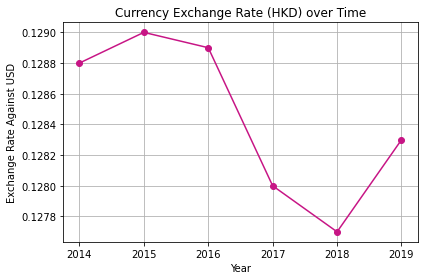

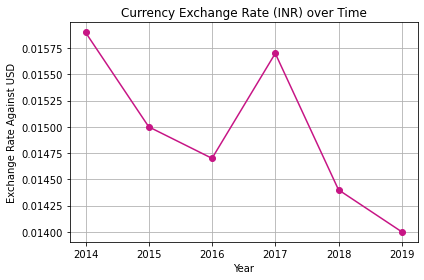

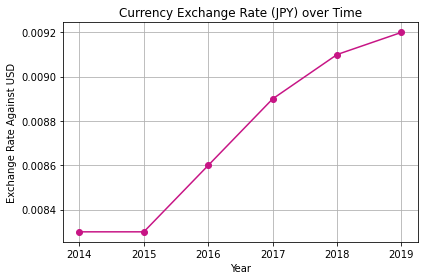

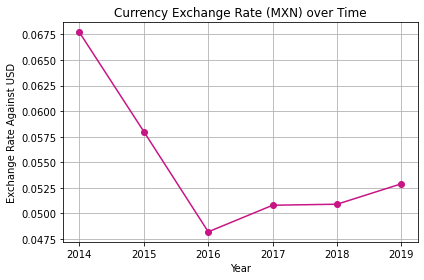

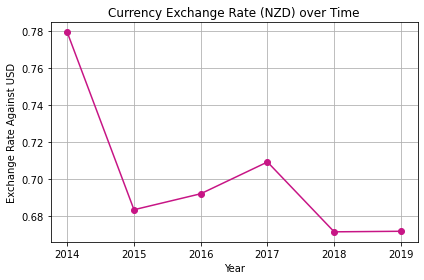

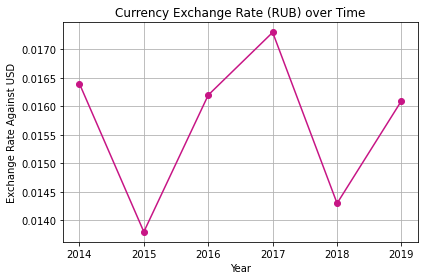

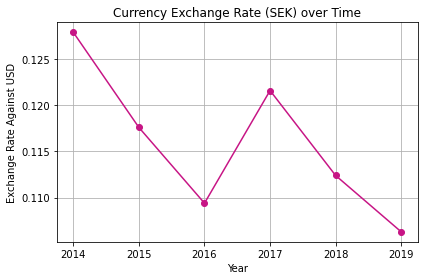

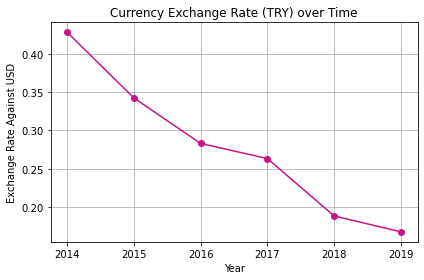

In [23]:
# loop through each unique currency code
for curr_code in curr_codes:
    # pull x and y values for chart
    year_data = sorted_analysis.loc[sorted_analysis["currency_code"] == curr_code]["year"]
    rate_data = sorted_analysis.loc[sorted_analysis["currency_code"] == curr_code]["close rate"].astype(float)

    # create a line plot
    plt.plot(year_data, rate_data, marker='o', color="mediumvioletred")

    # format title and axis labels
    plt.title(f"Currency Exchange Rate ({curr_code}) over Time")
    plt.xlabel("Year")
    plt.ylabel(f"Exchange Rate Against {base_currency}")
    
    # add a grid for looks
    plt.grid()
    
    # save a copy of the graph
    plt.tight_layout()
    plt.savefig(f"Output/ExchangeRateLineGraph_{curr_code}.png")
    
    # Show the chart
    plt.show()